<a href="https://colab.research.google.com/github/RLWH/tensorflow-certification-labs/blob/main/C1_W4_Lab_1_image_generator_no_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Training with ImageDataGenerator

In this lab, you will build a train a model on the Horses or Humans dataset. This contains over a thousand images of horses and humans with varying poses and filesizes. You will use the ImageDataGenerator class to prepare this dataset so it can be fed to a convolutional neural network.

IMPORTANT NOTE: This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

Run the code below to download the compressed dataset `horse-or-human.zip`.



In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-11-12 14:36:07--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.208, 172.217.164.144, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   176MB/s    in 0.8s    

2022-11-12 14:36:08 (176 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



Unzip the library by using zipfile module

In [2]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

The content of the `.zip` are extracted to the base directory `./horse-or-human`, which in turn each contain `horses` and `humans` subdirectories. 

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like' and 'this is what a human looks like'.

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. You will use the ImageDataGenerator API instead -- and this is coded to automatically label images according to the directory names and structure. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageDataGenerator will label the images appropriately for you, reducing a coding step.

You can now define each of these directories:



In [3]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

Now, we can see what inside each folder by using `os.listdir()`

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse11-2.png', 'horse05-4.png', 'horse29-8.png', 'horse42-5.png', 'horse30-0.png', 'horse09-6.png', 'horse28-8.png', 'horse23-8.png', 'horse44-0.png', 'horse26-5.png']
['human01-01.png', 'human11-12.png', 'human05-05.png', 'human09-29.png', 'human16-27.png', 'human09-04.png', 'human05-18.png', 'human03-05.png', 'human09-18.png', 'human13-12.png']


In [5]:
print(f'Total number of training images: {len(os.listdir(train_horse_dir))}')
print(f'Total number of testing images: {len(os.listdir(train_human_dir))}')

Total number of training images: 500
Total number of testing images: 527


Now, we can take a look at a few pictures to get better sense of what they look like, by using `matplotlib`. 

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
# Parameters for our graph; we will output images in a 4 x 4 grid
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Display a batch of 8 horses and 8 human pictures. 

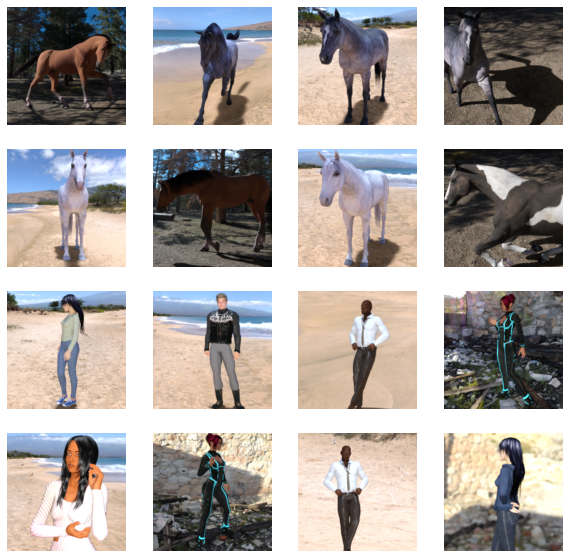

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

combined_list = next_horse_pix + next_human_pix

fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
plt.rcParams['figure.constrained_layout.use'] = True

for i in range(nrows):
    for j in range(ncols):
        image = mpimg.imread(combined_list[i * nrows + j])
        ax[i,j].imshow(image)
        ax[i,j].axis('Off')
plt.show()

# Build a small model from scratch

In [9]:
import tensorflow as tf

We then add the convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers. 

Note that this is a two-class classificatio problem, therefore we will use end the network with sigmoid activation. Using sigmoid activation will make the output value of the network a singular value between 0 and 1. 

Note that the input shape is the desired size of the image 300x300 with 3 bytes colour. 

In [10]:
model = tf.keras.models.Sequential([
    # First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512-neuron Dense Layer
    tf.keras.layers.Dense(512, activation='relu'),

    # One neuron outcome
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

The "output shape" column shows how the size of your feature map evolves in each successive layer. As you saw in an earlier lesson, the convolution layers removes the outermost pixels of the image, and each pooling layer halves the dimensions.

Next, you'll configure the specifications for model training. You will train the model with the `binary_crossentropy` loss because it's a binary classification problem, and the final activation is a sigmoid. (For a refresher on loss metrics, see this [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) You will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, you will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy']
              )

# Data Preprocessing

Next step is to set up the data generators that will read pictures in the source folders, convert them to `float32` tensors, and feed them (with their labels) to the model. 

We will have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary)

As we may already know, data that goes into neural networks should usually be normalised in some way to make it more amenable to processing by the network. In this case, we will preprocess the images by normalising the pixel values to be in the `[0, 1]` range, transformed from the original `[0, 255]` range. 

In Keras, we will use `keras.preprocessing.image.ImageDataGenerator` class using `rescale` parameter. The `ImageDataGenerator` class allows us to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human', # This is the source directory
    target_size=(300,300), # All images will be resized to 300x300
    batch_size=128,
    class_mode='binary' # Need binary labels for binary_crossentropy loss
)

Found 1027 images belonging to 2 classes.


In [14]:
next(train_generator)[0].shape

(128, 300, 300, 3)

# Training
We can start training for 15 epochs. 
The `loss` and `accuracy` are great indicators of progress in training. 
- `loss` measures the current model prediction against the known labels, calculating the result. 
- `accuracy` is the portion of correct gusses

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 16s 981ms/step - loss: 0.8918 - accuracy: 0.5462
Epoch 2/15
8/8 [==============================] - 6s 861ms/step - loss: 0.9331 - accuracy: 0.7798
Epoch 3/15
8/8 [==============================] - 6s 703ms/step - loss: 0.6170 - accuracy: 0.7831
Epoch 4/15
8/8 [==============================] - 6s 779ms/step - loss: 0.8077 - accuracy: 0.7653
Epoch 5/15
8/8 [==============================] - 6s 695ms/step - loss: 0.3357 - accuracy: 0.8843
Epoch 6/15
8/8 [==============================] - 6s 699ms/step - loss: 0.2181 - accuracy: 0.9232
Epoch 7/15
8/8 [==============================] - 6s 698ms/step - loss: 0.2391 - accuracy: 0.9088
Epoch 8/15
8/8 [==============================] - 7s 895ms/step - loss: 0.1333 - accuracy: 0.9434
Epoch 9/15
8/8 [==============================] - 6s 689ms/step - loss: 0.7917 - accuracy: 0.8231
Epoch 10/15
8/8 [==============================] - 6s 693ms/step - loss: 0.1208 - accuracy: 0.9588
Epoch 11/15
8/8 [=

# Model Prediction
Now take a look at actually running a prediction using the model. 


In [22]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()
print(uploaded.keys())

for fn in uploaded.keys():

    print("Predicting ", fn)
 
    # predicting images
    path = '/content/' + fn
    img = load_img(path, target_size=(300,300))
    x = img_to_array(img)
    x /= 255 # Normalisation
    x = np.expand_dims(x, axis=0)

    # Run prediction
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])

    # Classify
    if classes[0] > 0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")

Saving pexels-helena-lopes-1996333.jpg to pexels-helena-lopes-1996333 (1).jpg
dict_keys(['pexels-helena-lopes-1996333.jpg'])
Predicting  pexels-helena-lopes-1996333.jpg
1/1 [==============================] - 0s 278ms/step
[1.3490715e-07]
pexels-helena-lopes-1996333.jpg is a horse


# Visualising intermediate representation
To get a feel for what kind of features that our CNN has learned, one fun thing to do is to visualise how an input gets transformed as it goes through the model. 

We can pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image is the row is a specific filter in that output feature map. 

In [26]:
model.input

<KerasTensor: shape=(None, 300, 300, 3) dtype=float32 (created by layer 'conv2d_input')>

In [25]:
[layer.output for layer in model.layers[1:]]

[<KerasTensor: shape=(None, 149, 149, 16) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 147, 147, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 73, 73, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 71, 71, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 35, 35, 64) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 33, 33, 64) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_4')>,
 <KerasTensor: shape=(None, 3136) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 1) dtype

In [27]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will
# output intermediate representations for all alyers in the previous 
# model after the first. 
layer_outputs = [layer.output for layer in model.layers[1:]]
visualisation_model = tf.keras.models.Model(
    inputs=model.input,
    outputs=layer_outputs
)

# Prepare a random input image from the training set
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
full_images = horse_img_files + human_img_files
random_img_path = random.choice(full_images)

In [30]:
img = load_img(random_img_path, target_size=(300,300))
x = img_to_array(img) # Shape is (300, 300, 3)
x = x.reshape((1,) + x.shape) # Transform the shape to (1, 300, 300, 3)

# Rescaling
x /= 255

In [31]:
# Run the image through the network, thus obtaining all
# intermediate representations for the image
successive_feature_maps = visualisation_model.predict(x)

1/1 [==============================] - 0s 102ms/step


In [32]:
# We can call layer.name to see the layer names, so we can have them
# in the plot
layer_names = [layer.name for layer in model.layers[1:]]

layer_name: max_pooling2d - shape: (1, 149, 149, 16)
layer_name: conv2d_1 - shape: (1, 147, 147, 32)
layer_name: max_pooling2d_1 - shape: (1, 73, 73, 32)
layer_name: conv2d_2 - shape: (1, 71, 71, 64)
layer_name: max_pooling2d_2 - shape: (1, 35, 35, 64)
layer_name: conv2d_3 - shape: (1, 33, 33, 64)
layer_name: max_pooling2d_3 - shape: (1, 16, 16, 64)
layer_name: conv2d_4 - shape: (1, 14, 14, 64)
layer_name: max_pooling2d_4 - shape: (1, 7, 7, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  func(*args, **kwargs)


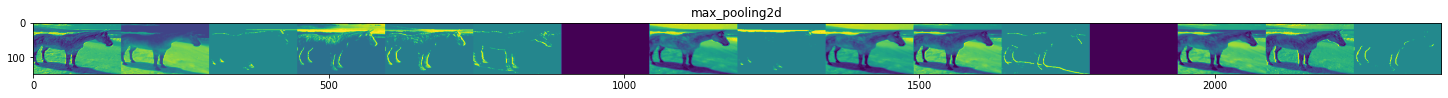

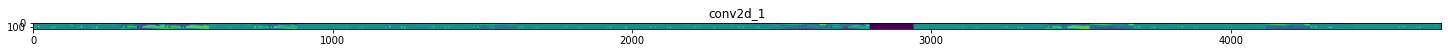

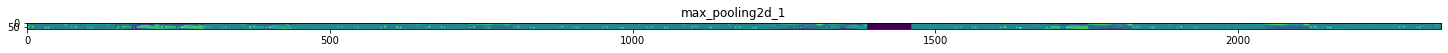

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


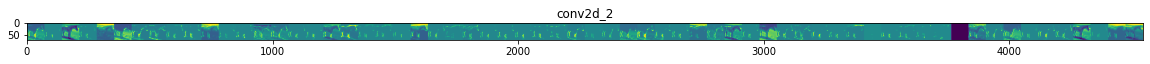

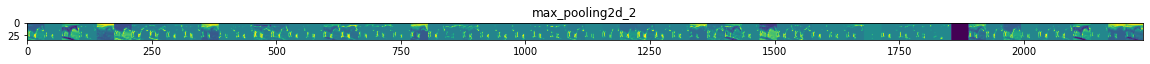

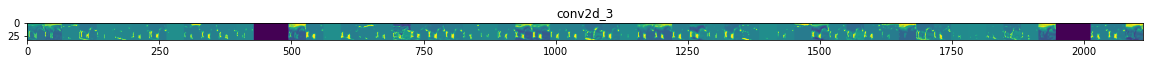

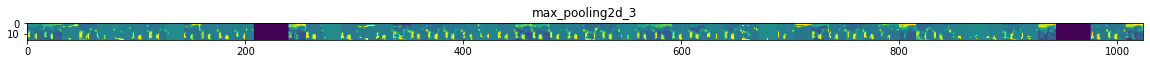

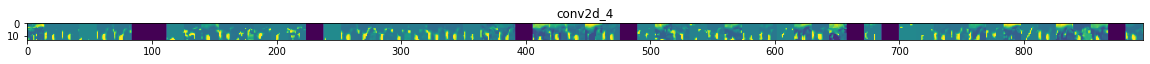

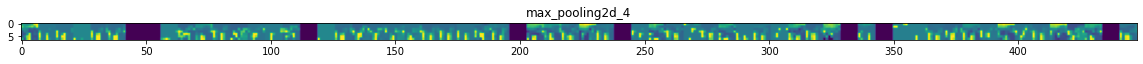

In [40]:
# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:
        # We only visualise the conv or maxpool layers, 
        # but not the fully connected layers

        # Extract the number of features from feature_maps
        print(f'layer_name: {layer_name} - shape: {feature_map.shape}')

        n_features = feature_map.shape[-1] # Number of features in feature map

        # The feature map has shape (1, size, size, n_features)
        # To get the size, we can get dimension 1
        size = feature_map.shape[1]

        # Tile the image in this matrix
        display_grid = np.zeros((size, size * n_features))

        for i in range(n_features):
            x = feature_map[0, :, :, i] # The i-th feature of the conv layer
            x = (x - x.mean())/x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8') # clip to 255

            # tile each filter into the big horizontal grid
            display_grid[:, i * size : (i+1) * size] = x

        # Display the grid
        scale = 20. / n_features
        fig, ax = plt.subplots(figsize=(scale * n_features, scale))
        ax.title.set_text(layer_name)
        ax.imshow(display_grid, aspect='auto', cmap='viridis')
